In [ ]:
import numpy as np
from globalConstants import *
import dynamiqs as dq
import jax
import jax.numpy as jnp # the JAX version of numpy
from matplotlib import pyplot
t_save = t_save
alpha = np.sqrt(-eps/(g2.conjugate()))


Hbuff = (g2 * dq.dag(a) @ dq.dag(a) @ b  + jnp.conj(g2) * a @ a @ dq.dag(b) 
         + jnp.conj(eps) * b + eps * dq.dag(b))
jump_ops = [jnp.sqrt(Kb)*b] # jump operators

exp_ops = [dq.dag(a) @ a] # expectation operators
res = dq.mesolve(Hbuff,jump_ops, psi0, t_save, exp_ops=exp_ops) # solve the master equation
# resimulating 1.1 so the data is in this scope


/Users/amer_/Documents/Obsidian Vault/Personal/Project Notes/Hackathon/iQuHack/2025-Alice-and-Bob/submission/globalConstants.py:42: UserWarning: Explicitly requested dtype <class 'jax.numpy.complex128'> requested in array is not available, and will be truncated to dtype complex64. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  diag = jnp.array([(-1)**i for i in range(n)], dtype=jnp.complex128)


### Analysis of 1.2
We observed that by changing the $k_B$ over time, that the local minimum of the function wouldn't change. However, the curve seemed to be more strongly damped in the sense that returning to a fidelity of one took longer.

![heyo.gif](attachment:heyo.gif)

In [2]:
rho_a_list = [state for state in res.states]
def fidelity(kappaB,t_save):
    """This function calculates the 
    fidelities of an evolving system under our
    closed, compared against the open modelled
    system.

    Args:
        kappaB (float): The desired varying 
        parameter
        t_save (float[]): the time sequence 
        used in our fidelity timestep

    Returns:
        float[]: an array representing the 
        fidelity between the two systems
        over time.
    """
    kappaB = 10
    kappa2 = 4*abs(g2)**2/kappaB
    jumpOperator = [jnp.sqrt(kappa2) * (a_tensored @ a_tensored - alpha**2*dq.tensor(dq.eye(na), dq.eye(nb)))]
    # D = dq.tensor(D_memory,Ib)
    # jump_ops = [jnp.sqrt(kappa2)*()]
    # For example, extract the underlying dense representation (if accessible)
    # and re-wrap it with the proper dims.
    Hzero = dq.tensor(dq.zeros(na), Ib)
    

    onePointTwo = dq.mesolve(Hzero,jumpOperator,psi0,t_save)
    # We only need a zero hamiltonian because we're not coupled to the outside
    # anymore
    onePointTwoList = [state for state in onePointTwo.states]
    fidelities = []
    for rho_full, rho_eff in zip(rho_a_list, onePointTwoList):
        # We zipped them together so that we could 
        # dual unpack
        fid = dq.fidelity(rho_full, rho_eff)
        fidelities.append(fid)
    fidelities = jnp.array(fidelities)
    return fidelities

|██████████| 100.0% ◆ elapsed 338.63ms ◆ remaining 0.00ms  


/Users/amer_/Documents/Obsidian Vault/Personal/Project Notes/Hackathon/iQuHack/lib/python3.12/site-packages/dynamiqs/qarrays/qarray.py:484: UserWarning: A sparse qarray has been converted to dense layout due to element-wise addition with a dense qarray.
  return self + (-y)
|██████████| 100.0% ◆ elapsed 593.55ms ◆ remaining 0.00ms  


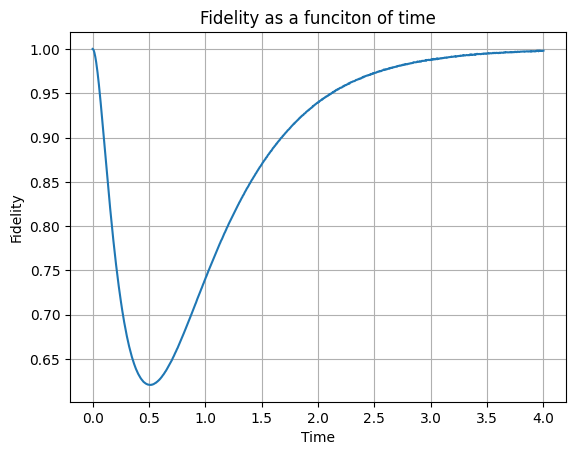

In [5]:
fidelities = fidelity(10,t_save)
plt.plot(t_save,fidelities)
plt.ylabel("Fidelity")
plt.xlabel("Time")
plt.title("Fidelity as a funciton of time")
plt.grid()

|██████████| 100.0% ◆ elapsed 539.78ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 563.73ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 544.53ms ◆ remaining 0.00ms  


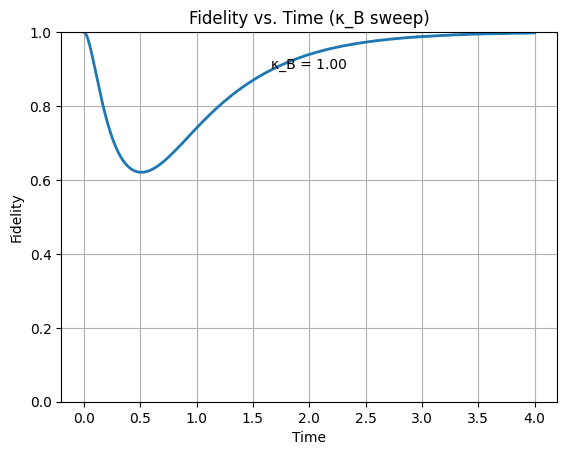

/Users/amer_/Documents/Obsidian Vault/Personal/Project Notes/Hackathon/iQuHack/lib/python3.12/site-packages/dynamiqs/qarrays/qarray.py:484: UserWarning: A sparse qarray has been converted to dense layout due to element-wise addition with a dense qarray.
  return self + (-y)
|██████████| 100.0% ◆ elapsed 513.72ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 508.53ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 511.72ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 515.71ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 515.37ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 514.60ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 521.14ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 514.80ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 514.38ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 518.07ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 512.60ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 509.68ms ◆ remaining 0.00ms  
|████

In [6]:
from matplotlib.animation import FuncAnimation

# Set up parameters for κ_B sweep
kappaB_values = jnp.arange(1, 10.5, 0.5)

# Set up figure for animation
fig, ax = plt.subplots()
initial_fid = fidelity(10,t_save)
line, = ax.plot(t_save, initial_fid, lw=2)
title_text = ax.text(0.5, 0.9, "", transform=ax.transAxes, ha="center")
ax.set_xlabel("Time")
ax.set_ylabel("Fidelity") 
ax.set_title("Fidelity vs. Time (κ_B sweep)")
ax.grid(True)
ax.set_ylim(0, 1)

def update(frame):
    """Update function for animation."""
    current_kB = kappaB_values[frame]
    fid_arr = fidelity(current_kB,t_save)
    line.set_ydata(fid_arr)
    title_text.set_text(f"κ_B = {current_kB:.2f}")
    return line, title_text

# Create animation
anim = FuncAnimation(fig, update, frames=len(kappaB_values), interval=200, blit=True)
plt.show()

# Save animation
anim.save("heyo.gif", fps=24)

|██████████| 100.0% ◆ elapsed 526.64ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 527.78ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 528.35ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 531.25ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 531.67ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 531.20ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 534.28ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 535.83ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 532.18ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 539.87ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 614.70ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 537.35ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 538.52ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 532.99ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 555.68ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 525.53ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 529.02ms ◆

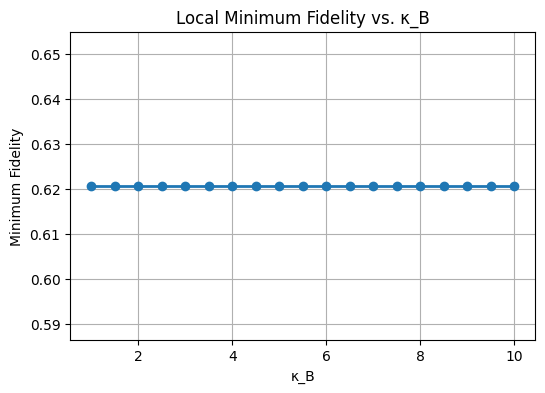

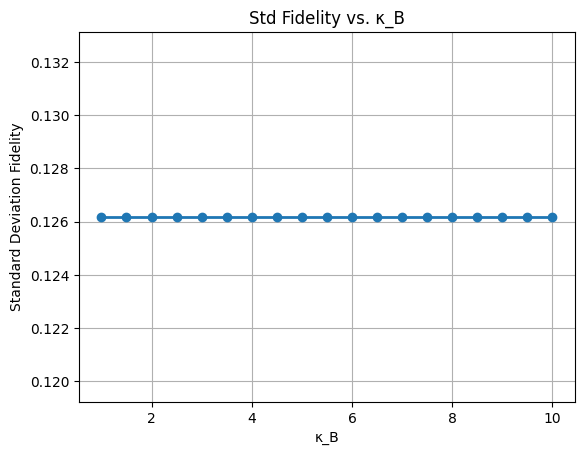

In [7]:
# Calculate minimum fidelities and standard deviations
min_fidelities = []
std_fidelities = []
for kB in kappaB_values:
    fid_curve = fidelity(kB,t_save)
    min_fidelities.append(jnp.min(fid_curve))
    std_fidelities.append(jnp.std(fid_curve))
min_fidelities = jnp.array(min_fidelities)

# Plot the minimum fidelity vs κ_B
plt.figure(figsize=(6,4))
plt.plot(kappaB_values, min_fidelities, 'o-', lw=2)
plt.xlabel("κ_B")
plt.ylabel("Minimum Fidelity")
plt.title("Local Minimum Fidelity vs. κ_B")
plt.grid(True)
plt.show()

# Plot standard deviation of fidelity vs κ_B
plt.figure()
plt.plot(kappaB_values, std_fidelities, 'o-', lw=2)
plt.xlabel("κ_B")
plt.ylabel("Standard Deviation Fidelity")
plt.title("Std Fidelity vs. κ_B")
plt.grid(True)
plt.show()

Looks like a leanord jones potential. It starts at the exact same state, then quickly falls to zero. Then somehow we slowly correct back to one

https://www.dynamiqs.org/stable/documentation/getting_started/sharp-bits.html
https://www.dynamiqs.org/stable/python_api/solver/Expm.html
https://www.dynamiqs.org/stable/python_api/utils/general/fidelity.html#dynamiqs.utils.general.fidelity
https://www.dynamiqs.org/stable/python_api/utils/operators/displace.html#dynamiqs.utils.operators.displace
https://www.dynamiqs.org/stable/documentation/advanced_examples/kerr-oscillator.html
